Training Neural Network
=====

### Reference : http://www.hanbit.co.kr/store/books/look.php?p_code=B8475831198
--------

## 1. Loss function
- 신경망의 성능을 측정하는 지표로, 현재의 신경망이 훈련 데이터를 잘 처리하는지 못하는지를  나타냄

### 1.1 Mean Squared Error

#### $E = \frac 1 2 \sum_{k}(y_k-t_k)^2$
- $y_k$ : 신경망의 출력(예측값)
- $t_k$ : 정답 레이블
- $k$ : 데이터의 차원 수

In [6]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = np.array([0,0,1,0,0,0,0,0,0])
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0])

print(mean_squared_error(y, t))

0.09750000000000003


### 1.2 Cross Entropy Error

#### $E = -\sum t_klogy_k$

### $E = - \frac 1 N \sum_{n} \sum_{k} t_{nk} logy_{nk}$

- 단일 데이터가 아닌 N개의 데이터에 대한 cross entropy error
- k개의 데이터를 임의로 추출하여 사용하는 mini-batch 방법을 사용함
- $t_{nk}$ : n번째 데이터의 k번째 값
- $y_{nk}$ : n번째 데이터의 k번째 예측값
- 마지막에 데이터의 크기 N으로 나눠줌으로써 정규화해준다. $\rightarrow$ 평균 손실 함수

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7  # inf가 되는 경우를 방지하기 위해 작은 상수를 더해줌
    return -np.sum(t * np.log(y + delta))

print(cross_entropy_error(y, t))

0.510825457099338


### 2. Mini Batch

In [22]:
from keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
x_train = x_train.reshape((60000, 784))

# 임의의 훈련 데이터 추출(mini-batch)
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

print(batch_mask)

[37251 13709 37172 48342 22100 45916 23870 53274 52447 26725]


In [23]:
# 배치용 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * log(y + 1e-7)) / batch_size

In [24]:
# label이 one-host encoding되지 않은 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 3. 수치 미분

In [25]:
def numerical_diff(f, x):
    h = 1e-4  # 너무 작은 값은 반올림 오차로 표기가 안됨
    return (f(x+h) - f(x-h)) / (2**h)  # x+h와 x값 사이의 차분에서 오차가 생김. 중심 차분을 사용!

#### 3.1 수치 미분의 예

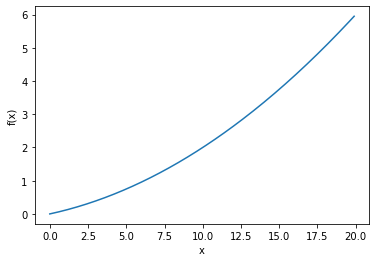

In [27]:
import matplotlib.pyplot as plt

def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [28]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

3.9997227507184116e-05
5.9995841260776174e-05


#### 3.2 편미분

$f(x_0, x_1) = x_0^2 + x_1^2$

Q1) $x_0=3, x_1=4, x_0$에 대한 편미분  
Q2) $x_0=3, x_1=4, x_1$에 대한 편미분  

In [30]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

# Q1
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

print(numerical_diff(function_tmp1, 3.0))


# Q2
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

0.0011999168252217404
0.0015998891002944695


### 4. 기울기

- 모든 변수의 편미분을 묶어서 ${(\frac {\partial f} {\partial x_0}, \frac {\partial f} {\partial x_1})}$ 벡터 형식으로 정리한 것을 기울기

In [ ]:
# 기울기 구현
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = fx(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = 